<center><u><H1>K-Means</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load the data

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

## Preprocessing

In [3]:
X2D = X[:,:2]
X_std = StandardScaler().fit_transform(X2D)

In [4]:
kmeans=KMeans(n_clusters=3)

## Create a model

In [5]:
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans.cluster_centers_

array([[ 1.18671078,  0.12437601],
       [-0.05899721, -0.90478291],
       [-0.97822861,  0.90390597]])

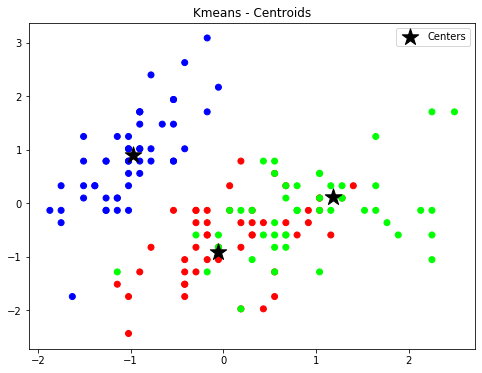

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_std[:,0], X_std[:,1], c=y, cmap=plt.cm.brg)
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:, 1], marker="*", s=300,
          color='black', label='Centers')
ax.set_title("Kmeans - Centroids")
ax.legend(loc='best')

## The Elbow Method

Text(0.5, 1.0, 'Selecting the best K')

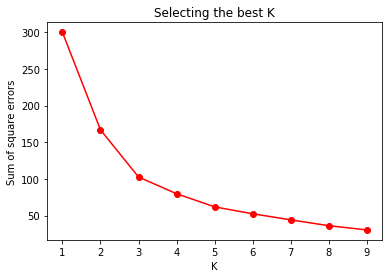

In [8]:
K = range(1, 10)
sse = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)
    
plt.plot(K, sse, marker='o', color='red')
plt.xlabel('K')
plt.ylabel('Sum of square errors') # within-cluster sum of squared distances
plt.title('Selecting the best K')  

## Reference:

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html